# Wstęp
Zadanie 10 jest pierwszą częścią zajęć laboratoryjnych poświęconych sieciom rekurencyjnym i predykcji z wykorzystaniem danych multimodalnych. Efektem prac będzie sieć rekurencyjna do predykcji kursu kryptowaluty Bitcoin (BTC) w oparciu o dane z giełdy oraz o wyniki analizy emocji komunikatów z mediów społecznościowych, do których również należy utworzyć dedykowany model sieci rekurencyjnej. Plan realizacji etapów wygląda następująco:

1.   EmoTweet - model sieci rekurencyjnej do analizy emocji (10 pkt., laboratorium 10)
2. Agregacja informacji emotywnej i przygotowanie MultiBTC - multimodalnego model sieci rekurencyjnej do predykcji kursu BTC (10 pkt., laboratorium 11)
3. Ewaluacja modelu MultiBTC (10 pkt., laboratorium 12)

Łącznie można otrzymać 30 punktów.

# Cel ćwiczenia

Celem pierwszego etapu prac jest zapoznanie się z podstawową siecią rekurencyjną LSTM. Ze względu na fakt, że model ten będzie wykorzystany do analizy emocji tekstu, w ramach teorii do zadania zostanie omówiony podstawowy mechanizm konwersji słów w tekście do postaci wektorów dystrybucyjnych (tzw. word embeddings) na podstawie rozwiązania o nazwie `fastText`. Modele będą budowane na ogólnodostępnym zbiorze `TweetEval`, zawierającym podzbiory ręcznie anotowanych tweetów przy pomocy etykiet odnoszących się do następujących zjawisk: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance). 

# Warunki zaliczenia

Do zaliczenia pierwszego etapu należy utworzyć następujące modele dla min. 2 wybranych zjawisk:

1.   Model bazowy (regresja logistyczna).
2.   Model rekurencyjny oparty o sieć LSTM.

Wytrenowane modele będą wykorzystane w 2 etapie, dlatego proszę je zachować.

# Wektory dystrybucyjne

W przetwarzaniu języka naturalnego, o wektorach dystrybucyjnych (inaczej osadzeniach lub zanurzeniach, ang. word embeddings) mówi się w kontekście reprezentacji słów w tekście, zazwyczaj w postaci wektora liczb rzeczywistych, który koduje znaczenie słowa. Hipoteza dystrybucyjna, u podstawy której leży większość metod reprezentacji, mówi o tym, że słowa, które często współwystępują, mają podobne znaczenie. Wektory dystrybucyjne można uzyskać za pomocą zestawu technik modelowania języka, w których słowa lub frazy są mapowane do wektorów liczb rzeczywistych. Z reguły polega to na matematycznym zanurzeniu z przestrzeni o wielu wymiarach opisujących słowo (konteksty) do ciągłej przestrzeni wektorowej o znacznie mniejszym wymiarze.

Metody generowania tego odwzorowania obejmują sieci neuronowe, redukcję wymiarowości na macierzy współwystępowania słów, modele probabilistyczne lub jawną reprezentację w kontekście, w którym pojawiają się słowa. Wektory dystrybucyjne, używane jako podstawowa reprezentacja wejściowa tekstu, okazały się istotnie poprawiać jakość w wielu zadaniach NLP, takich jak np. rozpoznawanie nazw własnych, określanie części mowy, rozpoznawanie dziedziny tekstu, czy też rozpoznawanie wydźwięku i emocji w tekście. 

# fastText

[fastText](https://fasttext.cc/) jest biblioteką do efektywnego uczenia modeli reprezentacji wektorowych słów oraz do budowania klasyfikatorów tekstu. Modele językowe można budować z wykorzystaniem dwóch popularnych technik: [Continuous Bag of Words](https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-cbow.html) oraz [Skip-Gram](https://towardsdatascience.com/skip-gram-nlp-context-words-prediction-algorithm-5bbf34f84e0c). 

## Instalacja

Pobranie repozytorium projektu:


In [1]:
!git clone https://github.com/facebookresearch/fastText.git

fatal: destination path 'fastText' already exists and is not an empty directory.


Instalacja biblioteki:

In [2]:
!cd fastText && mkdir build && cd build && cmake ..  && make && make install

A subdirectory or file build already exists.


Instalacja API do Pythona:

In [41]:
!cd fastText && pip3 install .

Processing d:\pwr\deep-neural-networks\fasttext
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pybind11-2.12.0-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
Failed to build fasttext


  error: subprocess-exited-with-error
  
  × Building wheel for fasttext (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [114 lines of output]
      C:\Users\Konrad\AppData\Local\Temp\pip-build-env-5sjsrdy8\overlay\Lib\site-packages\setuptools\dist.py:476: SetuptoolsDeprecationWarning: Invalid dash-separated options
      !!
      
              ********************************************************************************
              Usage of dash-separated 'description-file' will not be supported in future
              versions. Please use the underscore name 'description_file' instead.
      
              By 2024-Sep-26, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      
              See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
              ********************************************************************************
      
      !!
      

# Dane do etapu nr 1

## Korpus 
Korpus (zbiór dokumentów) do realizacji etapu nr 1 pochodzi z repozytorium [TweetEval](https://github.com/cardiffnlp/tweeteval). Repozytorium zawiera 7 różnorodnych zbiorów danych, zawierających zanonimizowane wpisy z [Twittera](https://twitter.com), anotowane następującymi zjawiskami: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance). 

In [4]:
# należy wgrać plik z katalogu "dane" o nazwie tweeteval.7z

In [5]:
!7za x tweeteval.7z

'7za' is not recognized as an internal or external command,
operable program or batch file.


## Zawartość korpusu

W katalogu głównym (tweeteval) znajdują się następujące elementy:
*   `datasets` - katalog ze zbiorami danych
   * `emotion` - tweety anotowane emocjami 
     * `mapping.txt` - identyfikatory etykiet oraz ich opis
     * `train_text.txt` - wpisy z Twittera (część ucząca)
     * `train_labels.txt` - etykiety wpisów z Twittera (część ucząca)
     * `test_*.txt, valid_*.txt` - j.w. (część testowa i walidacyjna)
   * `emoji` - tweety anotowane emotikonami
   * `...` - katalogi zawierające tweety anotowane pozostałymi zjawiskami
*   `predictions` - katalog z przykładowymi predykcjami
   * `emotion.txt` - etykiety modelu predykcyjnego dla części testowej danych `emotion`
   * `emoji.txt` - j.w. dla cz. testowej danych `emoji`
   * `...` - j.w. dla pozostałych danych
*   `evaluation_script.py` - skrypt do ewaluacji 

## Model języka

Na potrzeby zadania został przygotowany model Skip-Gram reprezentacji wektorowej słów, zbudowany na wielkim korpusie tweetów dotyczących kursu BTC. Wersja binarna tego modelu dostępna jest w 2 wariantach:
* wektory 100-elementowe (1.7GB, fasttext_tweetmodel_btc_sg_100_en.bin)
* wektory 20-elementowe (350MB, fasttext_tweetmodel_btc_sg_20_en.bin)

Na potrzeby prezentacji przykładowego rozwiązania zostanie wykorzystany mniejszy model. Do realizacji ostatecznego rozwiązania należy wykorzystać większy model. 



# Model bazowy rozpoznawania emocji

Model bazowy, zbudowany z wykorzystaniem narzędzia fastText (oparty o regresję logistyczną), będzie punktem wyjścia do porównania się z modelami opartymi o sieci LSTM, których skonstruowanie i ewaluacja na wybranych zadaniach będzie celem etapu nr 1. 

Pobranie mniejszego modelu reprezentacji języka tweetów:


In [6]:
# należy wgrać plik z katalogu "dane" o nazwie fasttext_tweetmodel_btc_sg_20_en.bin

Wydobycie słownika wektorów z binarnego modelu języka:

In [39]:
!python fastText/python/doc/examples/bin_to_vec.py fasttext_tweetmodel_btc_sg_20_en.bin > fasttext_tweetmodel_btc_sg_20_en.vec

Traceback (most recent call last):
  File "d:\pwr\deep-neural-networks\fastText\python\doc\examples\bin_to_vec.py", line 15, in <module>
    from fasttext import load_model
ModuleNotFoundError: No module named 'fasttext'


Dodanie prefiksu `__label__` do etykiet zbioru `emotion`:

In [13]:
!sed 's/^/__label__/g' tweeteval/datasets/emotion/train_labels.txt > train_labels_emo.txt
!sed 's/^/__label__/g' tweeteval/datasets/emotion/test_labels.txt > test_labels_emo.txt
!sed 's/^/__label__/g' tweeteval/datasets/emotion/val_labels.txt > val_labels_emo.txt

'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.


Przygotowanie zbioru uczącego, testowego i walidacyjnego w formacie `fastText`:

In [14]:
!paste -d " " tweeteval/datasets/emotion/train_text.txt train_labels_emo.txt > train_emo.txt
!paste -d " " tweeteval/datasets/emotion/test_text.txt test_labels_emo.txt > test_emo.txt
!paste -d " " tweeteval/datasets/emotion/val_text.txt val_labels_emo.txt > val_emo.txt

'paste' is not recognized as an internal or external command,
operable program or batch file.
'paste' is not recognized as an internal or external command,
operable program or batch file.
'paste' is not recognized as an internal or external command,
operable program or batch file.


Trenowanie modelu z wykorzystaniem wejścia `train_emo.txt`, z określeniem wyjściowej nazwy modelu `emo_model`, dla wektorów słów o wymiarze `20`, z wykorzystaniem pretrenowanych wektorów z pliku `fasttext_tweetmodel_btc_sg_20_en.vec` i z uruchomieniem dostrajania hiperparametrów na zbiorze walidacyjnym `val_emo.txt`:

In [15]:
!fasttext supervised -input train_emo.txt -output emo_model -dim 20 -pretrainedVectors fasttext_tweetmodel_btc_sg_20_en.vec -autotune-validation val_emo.txt 

'fasttext' is not recognized as an internal or external command,
operable program or batch file.


Podstawowa ewaluacja modelu z wykorzystaniem `fastText`, wynikiem jest precyzja (P - precision) i kompletność (R - recall) w wariancie [weighted](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html).

In [16]:
!fasttext test emo_model.bin test_emo.txt

'fasttext' is not recognized as an internal or external command,
operable program or batch file.


Rozszerzona ewaluacja modelu z wykorzystaniem `fastText`, wynikiem jest precyzja (P - precision), kompletność (R - recall) oraz F1-score dla każdej etykiety w wariancie [weighted](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html).

In [17]:
!fasttext test-label emo_model.bin test_emo.txt

'fasttext' is not recognized as an internal or external command,
operable program or batch file.


Przygotowanie danych do ewaluacji z wykorzystaniem skryptu dołączonego do zbioru TweetEval:

In [18]:
!mkdir predictions2

In [19]:
!fasttext predict emo_model.bin tweeteval/datasets/emotion/test_text.txt | sed 's/__label__//g' > predictions2/emotion.txt

'fasttext' is not recognized as an internal or external command,
operable program or batch file.


Uruchomienie ewaluacji. Oprócz wyników P, R, F1 [weighted]((https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)) dla każdej etykiety, otrzymujemy również wyniki w wariancie [macro]((https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)). **Ostateczną miarą (TweetEval Score) jest miara F1-score w wariancie macro i tę miarę proszę traktować jako kluczową przy porównywaniu rozwiązań.**

In [ ]:
!python tweeteval/evaluation_script.py --tweeteval_path tweeteval/datasets --predictions_path predictions2 --task emotion

0 {'precision': 0.6966966966966966, 'recall': 0.8315412186379928, 'f1-score': 0.7581699346405228, 'support': 558}
1 {'precision': 0.7239057239057239, 'recall': 0.6005586592178771, 'f1-score': 0.6564885496183206, 'support': 358}
2 {'precision': 0.5394736842105263, 'recall': 0.3333333333333333, 'f1-score': 0.41206030150753775, 'support': 123}
3 {'precision': 0.6780104712041884, 'recall': 0.6780104712041884, 'f1-score': 0.6780104712041884, 'support': 382}
accuracy 0.6889514426460239
macro avg {'precision': 0.6595216440042838, 'recall': 0.6108609205983478, 'f1-score': 0.6261823142426424, 'support': 1421}
weighted avg {'precision': 0.6849192604313165, 'recall': 0.6889514426460239, 'f1-score': 0.6810451381971834, 'support': 1421}
------------------------------
TweetEval Score (emotion): 0.6261823142426424


# Budowa modeli EmoTweet

W tej sekcji Państwa zadaniem będzie przygotowanie modeli sieci LSTM oraz modeli bazowych opartych o regresję logistyczną (fastText) dla wybranych 2 zjawisk ze zbioru TweetEval. Dla sieci LSTM kolejne jednostki sieci rekurencyjnej na wejściu dostają reprezentację wektorową kolejnych wyrazów w tekście. Wyjście z ostatniej jednostki podlega klasyfikacji. W celu usprawnienia zadania, przedstawiona zostanie metoda reprezentacji wektorowej tekstu z wykorzystaniem Pythonowego API do narzędzia fastText. Do ewaluacji modeli należy wykorzystać uprzednio zaprezentowany skrypt `tweeteval/evaluation_script.py`.

## Wektoryzacja tekstu


In [1]:
import fasttext

In [2]:
# ładowanie modelu
MODEL_PATH = 'fasttext_tweetmodel_btc_sg_100_en.bin'
fasttext_model = fasttext.load_model(MODEL_PATH)

In [93]:
# wczytanie danych treningowych
import pandas as pd
TRAIN_PATH = 'tweeteval/datasets/emotion/train_text.txt'
train_texts = pd.read_csv(TRAIN_PATH, sep='\t', header=None)
train_texts

,0
0,“Worry is a down payment on a problem you may ...
1,My roommate: it's okay that we can't spell bec...
2,No but that's so cute. Atsu was probably shy a...
3,Rooneys fucking untouchable isn't he? Been fuc...
4,it's pretty depressing when u hit pan on ur fa...
...,...
3252,I get discouraged because I try for 5 fucking ...
3253,The @user are in contention and hosting @user ...
3254,@user @user @user @user @user as a fellow UP g...
3255,You have a #problem? Yes! Can you do #somethin...


In [94]:
# wektoryzacja pierwszego tekstu
first_text = train_texts[0][0]
for word in fasttext.tokenize(first_text):
  print(word, fasttext_model.get_word_id(word), fasttext_model.get_word_vector(word))

“Worry -1 [-0.1095121   0.38090888 -1.0336643  -0.20598327 -0.07277284 -0.15348345
  0.20092662 -1.0153742   0.41634655 -0.31784526  0.11348502 -0.20910835
  0.7874847  -0.67356557 -0.01658224  0.09617221  0.12358497 -0.71671605
 -0.20007092  0.46872017  0.6986645  -0.03173061 -0.06014305  0.20621948
 -0.42030373 -0.9180052   0.2993617   0.27752367 -0.30830047 -0.20500445
  0.3670116  -0.32252508  0.2233359   0.5305474   0.37008417 -0.41395086
  0.06991661  0.0071343   0.27354914 -0.14001684 -0.5481983  -0.00806855
  0.2036093   0.52803385 -0.19260973 -0.3619391   0.35432452  0.09835459
  0.15183051 -0.09794492  0.13949823 -0.12930089  0.22668041 -0.34315103
 -1.4427141  -0.8985706  -0.33731195  0.5025432   0.39719608 -0.22974221
  0.1895984   0.09019955 -0.23765452  0.2115466   0.7556613  -0.5855718
  0.05130569  0.10120074  0.41250637  0.10245477  0.15483187  0.59118235
 -0.527494   -0.06366938  1.1069677   0.44445527  0.22453506 -0.16477649
  0.164479   -0.45592377  0.5683366   0.83

Proszę zwrócić uwagę, że fastText jest w stanie przyporządkować reprezentację wektorową nawet dla takich słów, których model języka nie widział w trakcie uczenia (pierwszy token wejściowego tekstu). 

In [95]:
TRAIN_LABELS_PATH = 'tweeteval/datasets/emotion/train_labels.txt'
train_labels = pd.read_csv(TRAIN_LABELS_PATH, sep='\t', header=None)
train_labels

,0
0,2
1,0
2,1
3,0
4,3
...,...
3252,3
3253,3
3254,0
3255,0


## Model klasyfikacji tekstu LSTM (2 pkt.)

In [3]:
from torch import nn
import torch
from torch.nn import functional as F

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(LSTMModel, self).__init__()


        self.lstms = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)


    def forward(self, x):
        out =self.lstms(x)
        out = self.fc(out[0][:,-1,:])
        return out
        


## Trenowanie modeli LSTM dla ZJAWISKO_1 i ZJAWISKO_2 (2 pkt.)
Należy wybrać 2 z 7 dostępnych podzbiorów z [TweetEval](https://github.com/cardiffnlp/tweeteval) anotowanych następującymi zjawiskami: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance).

In [4]:
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence


class TweetDataset(Dataset):
    def __init__(self, texts, labels, fasttext_model):
        
        self.texts = texts
        self.labels = torch.tensor(labels)
        self.model = fasttext_model

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        
        return {
            'embedding': torch.stack([torch.tensor(self.model.get_word_vector(word)) for word in fasttext.tokenize(self.texts[idx])]),
            'label': self.labels[idx],
        }

def collate_fn(batch):
    embeddings = [item['embedding'] for item in batch]
    labels = [item['label'] for item in batch]
    return pad_sequence(embeddings, batch_first=True), torch.stack(labels)

In [5]:
# sentiment, irony
import pandas as pd
from torch.utils.data import Dataset, DataLoader

TRAIN_SENTIMENT_PATH = 'tweeteval/datasets/sentiment/train_text.txt'
TRAIN_SENTIMENT_LABELS_PATH = 'tweeteval/datasets/sentiment/train_labels.txt'
TRAIN_IRONY_PATH = 'tweeteval/datasets/irony/train_text.txt'
TRAIN_IRONY_LABELS_PATH = 'tweeteval/datasets/irony/train_labels.txt'

train_sentiment_texts = pd.read_csv(TRAIN_SENTIMENT_PATH, sep='\t', header=None)
train_sentiment_labels = pd.read_csv(TRAIN_SENTIMENT_LABELS_PATH, sep='\t', header=None)
train_irony_texts = pd.read_csv(TRAIN_IRONY_PATH, sep='\t', header=None, on_bad_lines='skip')
train_irony_labels = pd.read_csv(TRAIN_IRONY_LABELS_PATH, sep='\t', header=None)

irony_ds = pd.concat([train_irony_texts, train_irony_labels], axis=1)
irony_ds.columns = ['text', 'label']
irony_ds = irony_ds.dropna()

sentiment_ds = pd.concat([train_sentiment_texts, train_sentiment_labels], axis=1)
sentiment_ds.columns = ['text', 'label']
sentiment_ds = sentiment_ds.dropna()

irony_train_ds = TweetDataset(irony_ds['text'], irony_ds['label'], fasttext_model=fasttext_model)
sentiment_train_ds = TweetDataset(sentiment_ds['text'], sentiment_ds['label'], fasttext_model=fasttext_model)

irony_train_dl = DataLoader(irony_train_ds, batch_size=32, shuffle=True, collate_fn=collate_fn)
sentiment_train_dl = DataLoader(sentiment_train_ds, batch_size=32, shuffle=True, collate_fn=collate_fn)

In [6]:
VAL_SENTIMENT_PATH = 'tweeteval/datasets/sentiment/val_text.txt'
VAL_SENTIMENT_LABELS_PATH = 'tweeteval/datasets/sentiment/val_labels.txt'
VAL_IRONY_PATH = 'tweeteval/datasets/irony/val_text.txt'
VAL_IRONY_LABELS_PATH = 'tweeteval/datasets/irony/val_labels.txt'

val_sentiment_texts = pd.read_csv(VAL_SENTIMENT_PATH, sep='\t', header=None)
val_sentiment_labels = pd.read_csv(VAL_SENTIMENT_LABELS_PATH, sep='\t', header=None)
val_irony_texts = pd.read_csv(VAL_IRONY_PATH, sep='\t', header=None, on_bad_lines='skip')
val_irony_labels = pd.read_csv(VAL_IRONY_LABELS_PATH, sep='\t', header=None)

irony_ds_val = pd.concat([val_irony_texts, val_irony_labels], axis=1)
irony_ds_val.columns = ['text', 'label']
irony_ds_val = irony_ds_val.dropna()

sentiment_ds_val = pd.concat([val_sentiment_texts, val_sentiment_labels], axis=1)
sentiment_ds_val.columns = ['text', 'label']
sentiment_ds_val = sentiment_ds_val.dropna()

irony_val_ds = TweetDataset(irony_ds_val['text'], irony_ds_val['label'], fasttext_model=fasttext_model)
sentiment_val_ds = TweetDataset(sentiment_ds_val['text'], sentiment_ds_val['label'], fasttext_model=fasttext_model)

irony_val_dl = DataLoader(irony_val_ds, batch_size=32, shuffle=True, collate_fn=collate_fn)
sentiment_val_dl = DataLoader(sentiment_val_ds, batch_size=32, shuffle=True, collate_fn=collate_fn)

In [7]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from typing import Tuple
from tqdm import tqdm

def count_correct(
    y_pred: torch.Tensor, y_true: torch.Tensor
) -> torch.Tensor:
    preds = torch.argmax(y_pred, dim=1)
    return (preds == y_true).float().sum()

def validate(
    model: nn.Module,
    loss_fn: torch.nn.CrossEntropyLoss,
    dataloader: DataLoader
):
    loss = 0
    correct = 0
    all = 0
    for X_batch, y_batch in dataloader:
        y_pred = model(X_batch.cuda())
        all += len(y_pred)
        loss += loss_fn(y_pred, y_batch.cuda()).sum()
        correct += count_correct(y_pred, y_batch.cuda())
    return loss / all, correct / all

def fit(
    model: nn.Module, optimiser: optim.Optimizer,
    loss_fn: torch.nn.CrossEntropyLoss,
    train_dl: DataLoader,
    val_dl: DataLoader,
    epochs: int,
    print_metrics: bool = False,
    name: str ='',
    patience: int = 3,
):
    last_better_epoch = 0
    low_val_loss = float('inf')
    low_acc_loss = float('inf')
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in tqdm(train_dl, desc=f"Epoch {epoch}"):
            X_batch = X_batch.to('cuda')
            y_batch = y_batch.to('cuda')
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch.long())

            loss.backward()
            optimiser.step()
            optimiser.zero_grad()

        model.eval()
        with torch.no_grad():
            train_loss, train_acc = validate(model, loss_fn, train_dl)
            val_loss, val_acc = validate(model, loss_fn, val_dl)

            if val_loss < low_val_loss:
                low_val_loss = val_loss
                low_acc_loss = val_acc
                last_better_epoch = epoch

                torch.save(model.state_dict(), f"{name}_model.pt")

            if patience is not None and epoch - last_better_epoch > patience:
                print(f"Early stopping on epoch {epoch}")
                break

            if print_metrics:
                print(
                    f"Epoch {name} {epoch}: "
                    f"train loss = {train_loss:.3f} (acc: {train_acc:.3f}), "
                    f"validation loss = {val_loss:.3f} (acc: {val_acc:.3f})"
                )

    return low_val_loss, low_acc_loss

In [249]:
model = LSTMModel(
    input_dim=100,
    hidden_dim=128,
    output_dim=2,
    num_layers=2
).cuda()


optimiser = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()

fit(model, optimiser, loss_fn, irony_train_dl, irony_val_dl, epochs=100, print_metrics=True, name='irony')

Epoch 0: 100%|██████████| 90/90 [00:02<00:00, 40.30it/s]


Epoch irony 0: train loss = 0.022 (acc: 0.505), validation loss = 0.022 (acc: 0.477)


Epoch 1: 100%|██████████| 90/90 [00:01<00:00, 47.67it/s]


Epoch irony 1: train loss = 0.022 (acc: 0.505), validation loss = 0.022 (acc: 0.477)


Epoch 2: 100%|██████████| 90/90 [00:02<00:00, 44.06it/s]


Epoch irony 2: train loss = 0.022 (acc: 0.505), validation loss = 0.022 (acc: 0.477)


Epoch 3: 100%|██████████| 90/90 [00:02<00:00, 40.15it/s]


Epoch irony 3: train loss = 0.022 (acc: 0.505), validation loss = 0.022 (acc: 0.477)


Epoch 4: 100%|██████████| 90/90 [00:01<00:00, 47.59it/s]


Epoch irony 4: train loss = 0.022 (acc: 0.505), validation loss = 0.022 (acc: 0.477)


Epoch 5: 100%|██████████| 90/90 [00:02<00:00, 42.61it/s]


Epoch irony 5: train loss = 0.022 (acc: 0.508), validation loss = 0.022 (acc: 0.479)


Epoch 6: 100%|██████████| 90/90 [00:02<00:00, 42.89it/s]


Epoch irony 6: train loss = 0.022 (acc: 0.509), validation loss = 0.022 (acc: 0.480)


Epoch 7: 100%|██████████| 90/90 [00:01<00:00, 49.00it/s]


Epoch irony 7: train loss = 0.022 (acc: 0.510), validation loss = 0.022 (acc: 0.476)


Epoch 8: 100%|██████████| 90/90 [00:01<00:00, 45.56it/s]


Epoch irony 8: train loss = 0.022 (acc: 0.532), validation loss = 0.022 (acc: 0.555)


Epoch 9: 100%|██████████| 90/90 [00:02<00:00, 42.64it/s]


Epoch irony 9: train loss = 0.022 (acc: 0.520), validation loss = 0.022 (acc: 0.549)


Epoch 10: 100%|██████████| 90/90 [00:01<00:00, 47.51it/s]


Epoch irony 10: train loss = 0.022 (acc: 0.546), validation loss = 0.022 (acc: 0.563)


Epoch 11: 100%|██████████| 90/90 [00:01<00:00, 45.47it/s]


Epoch irony 11: train loss = 0.021 (acc: 0.574), validation loss = 0.021 (acc: 0.574)


Epoch 12: 100%|██████████| 90/90 [00:02<00:00, 39.60it/s]


Epoch irony 12: train loss = 0.021 (acc: 0.562), validation loss = 0.021 (acc: 0.582)


Epoch 13: 100%|██████████| 90/90 [00:02<00:00, 43.40it/s]


Epoch irony 13: train loss = 0.021 (acc: 0.574), validation loss = 0.021 (acc: 0.583)


Epoch 14: 100%|██████████| 90/90 [00:02<00:00, 42.13it/s]


Epoch irony 14: train loss = 0.021 (acc: 0.568), validation loss = 0.021 (acc: 0.552)


Epoch 15: 100%|██████████| 90/90 [00:02<00:00, 40.26it/s]


Epoch irony 15: train loss = 0.021 (acc: 0.576), validation loss = 0.021 (acc: 0.602)


Epoch 16: 100%|██████████| 90/90 [00:02<00:00, 44.99it/s]


Epoch irony 16: train loss = 0.021 (acc: 0.589), validation loss = 0.021 (acc: 0.605)


Epoch 17: 100%|██████████| 90/90 [00:01<00:00, 48.03it/s]


Epoch irony 17: train loss = 0.021 (acc: 0.594), validation loss = 0.021 (acc: 0.579)


Epoch 18: 100%|██████████| 90/90 [00:02<00:00, 42.55it/s]


Epoch irony 18: train loss = 0.021 (acc: 0.574), validation loss = 0.021 (acc: 0.545)


Epoch 19: 100%|██████████| 90/90 [00:02<00:00, 42.50it/s]


Epoch irony 19: train loss = 0.021 (acc: 0.595), validation loss = 0.021 (acc: 0.614)


Epoch 20: 100%|██████████| 90/90 [00:01<00:00, 48.46it/s]


Epoch irony 20: train loss = 0.021 (acc: 0.575), validation loss = 0.021 (acc: 0.587)


Epoch 21: 100%|██████████| 90/90 [00:02<00:00, 41.09it/s]


Epoch irony 21: train loss = 0.021 (acc: 0.590), validation loss = 0.021 (acc: 0.612)


Epoch 22: 100%|██████████| 90/90 [00:02<00:00, 42.34it/s]


Epoch irony 22: train loss = 0.020 (acc: 0.611), validation loss = 0.021 (acc: 0.595)


Epoch 23: 100%|██████████| 90/90 [00:02<00:00, 44.19it/s]


Epoch irony 23: train loss = 0.020 (acc: 0.622), validation loss = 0.021 (acc: 0.605)


Epoch 24: 100%|██████████| 90/90 [00:02<00:00, 37.43it/s]


Epoch irony 24: train loss = 0.020 (acc: 0.615), validation loss = 0.021 (acc: 0.591)


Epoch 25: 100%|██████████| 90/90 [00:02<00:00, 42.50it/s]


Epoch irony 25: train loss = 0.020 (acc: 0.604), validation loss = 0.021 (acc: 0.600)


Epoch 26: 100%|██████████| 90/90 [00:01<00:00, 45.88it/s]


Epoch irony 26: train loss = 0.020 (acc: 0.636), validation loss = 0.021 (acc: 0.604)


Epoch 27: 100%|██████████| 90/90 [00:02<00:00, 39.67it/s]


Early stopping on epoch 27


(tensor(0.0207, device='cuda:0'), tensor(0.6052, device='cuda:0'))

In [250]:
model = LSTMModel(
    input_dim=100,
    hidden_dim=128,
    output_dim=2,
    num_layers=2
).cuda()

model.load_state_dict(torch.load('irony_model.pt'))


<All keys matched successfully>

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       499
           1       0.58      0.59      0.59       456

    accuracy                           0.60       955
   macro avg       0.60      0.60      0.60       955
weighted avg       0.60      0.60      0.60       955



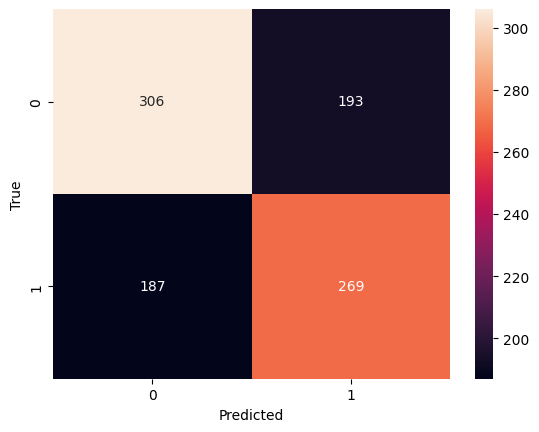

In [251]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(torch.argmax(model(X_batch.cuda()), dim=1).cpu().numpy())

    print(classification_report(y_true, y_pred))
    sns.heatmap(pd.crosstab(pd.Series(y_true), pd.Series(y_pred), rownames=['True'], colnames=['Predicted']), annot=True, fmt='d')
    


evaluate(model, irony_val_dl)


In [15]:
model = LSTMModel(
    input_dim=100,
    hidden_dim=256,
    output_dim=3,
    num_layers=1
).cuda()

optimiser = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()

fit(model, optimiser, loss_fn, sentiment_train_dl, sentiment_val_dl, epochs=100, print_metrics=True, name='sentiment')

Epoch 0:   0%|          | 0/1137 [00:00<?, ?it/s]


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
model = LSTMModel(
    input_dim=100,
    hidden_dim=128,
    output_dim=3,
    num_layers=3
).cuda()

model.load_state_dict(torch.load('sentiment_model.pt'))

evaluate(model, sentiment_val_dl)

RuntimeError: Error(s) in loading state_dict for LSTMModel:
	Missing key(s) in state_dict: "lstms.weight_ih_l2", "lstms.weight_hh_l2", "lstms.bias_ih_l2", "lstms.bias_hh_l2". 
	size mismatch for lstms.weight_ih_l0: copying a param with shape torch.Size([1024, 100]) from checkpoint, the shape in current model is torch.Size([512, 100]).
	size mismatch for lstms.weight_hh_l0: copying a param with shape torch.Size([1024, 256]) from checkpoint, the shape in current model is torch.Size([512, 128]).
	size mismatch for lstms.bias_ih_l0: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for lstms.bias_hh_l0: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for lstms.weight_ih_l1: copying a param with shape torch.Size([1024, 256]) from checkpoint, the shape in current model is torch.Size([512, 128]).
	size mismatch for lstms.weight_hh_l1: copying a param with shape torch.Size([1024, 256]) from checkpoint, the shape in current model is torch.Size([512, 128]).
	size mismatch for lstms.bias_ih_l1: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for lstms.bias_hh_l1: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for fc.weight: copying a param with shape torch.Size([3, 256]) from checkpoint, the shape in current model is torch.Size([3, 128]).

## Trenowanie modeli LR (fastText) dla ZJAWISKO_1 i ZJAWISKO_2 (2 pkt.)

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def train_lr(dataset: TweetDataset):
    X = []
    y = []
    for i in range(len(dataset)):
        X.append(dataset[i]['embedding'].mean(dim=0).numpy())
        y.append(dataset[i]['label'].item())

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression())
    ])

    pipeline.fit(X, y)
    return pipeline


def evaluate_lr(model, dataset):
    X = []
    y = []
    for i in range(len(dataset)):
        X.append(dataset[i]['embedding'].mean(dim=0).numpy())
        y.append(dataset[i]['label'].item())

    y_pred = model.predict(X)
    print(classification_report(y, y_pred))
    sns.heatmap(pd.crosstab(pd.Series(y), pd.Series(y_pred), rownames=['True'], colnames=['Predicted']), annot=True, fmt='d')

              precision    recall  f1-score   support

           0       0.62      0.57      0.60       499
           1       0.57      0.62      0.59       456

    accuracy                           0.60       955
   macro avg       0.60      0.60      0.60       955
weighted avg       0.60      0.60      0.60       955



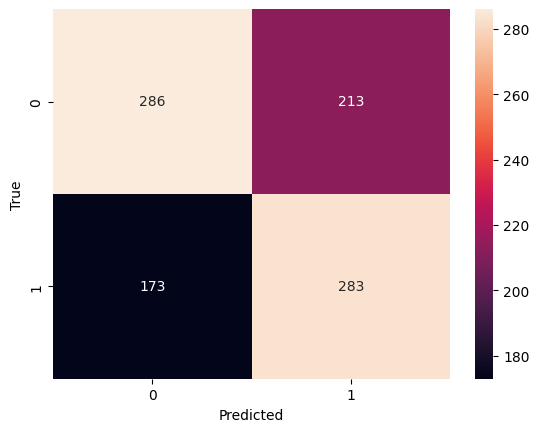

In [141]:
lr_irony = train_lr(irony_train_ds)
evaluate_lr(lr_irony, irony_val_ds)

c:\Users\Konrad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Konrad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Konrad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       258
           1       0.44      0.92      0.60       713
           2       0.41      0.09      0.14       652

    accuracy                           0.44      1623
   macro avg       0.28      0.33      0.25      1623
weighted avg       0.36      0.44      0.32      1623



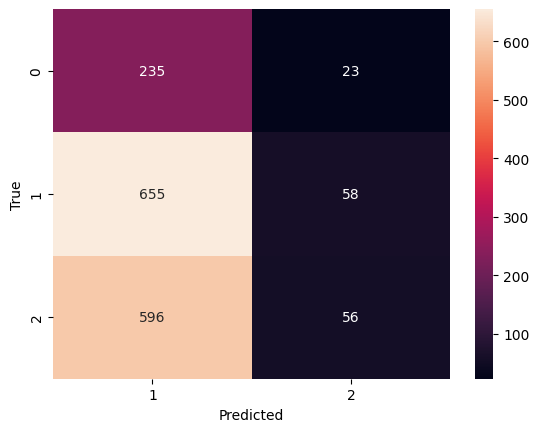

In [142]:
lr_sentiment = train_lr(sentiment_train_ds)
evaluate_lr(lr_sentiment, sentiment_val_ds)

## Ewaluacja modeli na danych testowych dla zjawiska ZJAWISKO_1 (2 pkt.)

In [ ]:
#TODO

## Ewaluacja modeli na danych testowych dla zjawiska ZJAWISKO_2 (2 pkt.)

In [ ]:
#TODO